Data Preprocessing

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# path for landmarks storing
DATA_PATH = os.path.join('MP_Data') 

# sign list
actions = np.array(["hi", "how are you", "fine", "good bye", "please",
                    "cute", "handsome", "good", "bad", "delicious", 
                    'yes', 'no', "sorry", "thank you", "you are welcome", 
                    "happy", "sad", "bored", "angry", "hate" ])

# number of sequence for each sign
no_sequences = 100

# length of each sequence
sequence_length = 30

In [4]:
label_map = {label:num for num, label in enumerate(actions)}

print(label_map)

{'hi': 0, 'how are you': 1, 'fine': 2, 'good bye': 3, 'please': 4, 'cute': 5, 'handsome': 6, 'good': 7, 'bad': 8, 'delicious': 9, 'yes': 10, 'no': 11, 'sorry': 12, 'thank you': 13, 'you are welcome': 14, 'happy': 15, 'sad': 16, 'bored': 17, 'angry': 18, 'hate': 19}


In [5]:
#Data augmentation

#add random noise into sequence
def add_noise(keypoints, noise_factor=0.02):
    noise = np.random.normal(0, noise_factor, keypoints.shape)
    return keypoints + noise

#scale keypoints
def scale_keypoints(keypoints, scale_range=(0.9, 1.1)):
    
    scale = np.random.uniform(scale_range[0], scale_range[1])
    return keypoints * scale

#tranlsate keypoints
def translate_keypoints(keypoints, translation_range=0.1):

    translation = np.random.uniform(-translation_range, translation_range)
    return keypoints + translation


In [6]:
# randomly apply data augmentation
def augment_sequence(sequence):
    augmented = sequence.copy()
    applied = False
    
    if np.random.random() < 0.5:
        augmented = add_noise(augmented)
        applied = True
    
    if np.random.random() < 0.5:
        augmented = scale_keypoints(augmented)
        applied = True
    
    if np.random.random() < 0.5:
        augmented = translate_keypoints(augmented)
        applied = True
    
    # ensure at least one augmentation is applied
    if not applied:
       
        augmentation_functions = [add_noise, scale_keypoints, translate_keypoints]
        
        augmented = np.random.choice(augmentation_functions)(augmented)
    
    return augmented

In [7]:
# load data
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence+1), "{}.npy".format(frame_num)))
            window.append(res)
        
        # original sequence
        sequences.append(window)
        labels.append(label_map[action])
        print(str(len(labels)))
        
        for _ in range(4):  # 4 augmented versions per sequence
            augmented_window = augment_sequence(np.array(window))
            sequences.append(augmented_window)
            labels.append(label_map[action])
            print(str(len(labels)))
        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
np.array(sequences).shape

(10000, 30, 126)

In [9]:
np.array(labels).shape

(10000,)

Data splitting

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GlobalAveragePooling1D

In [ ]:
# base
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

# with Dropout
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
# model.add(Dropout(0.1))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(Dropout(0.1))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

# simplified
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(30,126)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

# simplified
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(actions.shape[0], activation='softmax'))

# # bidirectional
# model = Sequential()
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.6))
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.6))
# model.add(GlobalAveragePooling1D())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))



In [334]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint_callback = ModelCheckpoint(
    filepath=r"C:\Users\Lenovo\Desktop\AI\lstm\bidirectional_no_pooling.keras",
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True,
    )

In [ ]:
model.fit(X_train, y_train,epochs=100, validation_split=0.2, callbacks=[model_checkpoint_callback, tb_callback, early_stop], verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - categorical_accuracy: 0.1898 - loss: 2.5284 - val_categorical_accuracy: 0.6219 - val_loss: 1.1323
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - categorical_accuracy: 0.5883 - loss: 1.1603 - val_categorical_accuracy: 0.7131 - val_loss: 0.7440
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - categorical_accuracy: 0.7373 - loss: 0.7140 - val_categorical_accuracy: 0.8081 - val_loss: 0.4836
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - categorical_accuracy: 0.8069 - loss: 0.5456 - val_categorical_accuracy: 0.9025 - val_loss: 0.3094
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - categorical_accuracy: 0.8642 - loss: 0.4044 - val_categorical_accuracy: 0.8731 - val_loss: 0.3359
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - categorical_accuracy: 0.8842 - loss: 0.3570 - val_categorical_accuracy: 0.9294 - val_loss: 0.2040
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - categorical_accuracy

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np


for i in [0.1, 0.2, 0.3, 0.4, 0.5]:

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    accuracy_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = Sequential()
        model.add(LSTM(64, return_sequences=True, input_shape=(30,126)))
        model.add(Dropout(i))
        model.add(LSTM(64, return_sequences=False))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(i))
        model.add(Dense(actions.shape[0], activation='softmax'))

        model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

        log_dir = os.path.join('Logs')
        tb_callback = TensorBoard(log_dir=log_dir)
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint_callback = ModelCheckpoint(
            filepath=rf"C:\Users\Lenovo\Desktop\AI\lstm\simplified_test_{i}.keras",
            monitor='val_categorical_accuracy',
            mode='max',
            save_best_only=True,
            )
     
        model.fit(X_train, y_train,epochs=100, validation_data=(X_val, y_val), 
                  callbacks=[model_checkpoint_callback, tb_callback, early_stop], verbose=1)

        y_pred = model.predict(X_val)

        y_pred=np.argmax(y_pred, axis=1)
        y_val=np.argmax(y_val, axis=1)
        accuracy = accuracy_score(y_val, y_pred,)
        accuracy_scores.append(accuracy)

    print("Accuracy scores for each fold:", accuracy_scores)
    print("Average accuracy:", np.mean(accuracy_scores))

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - categorical_accuracy: 0.2765 - loss: 2.1393 - val_categorical_accuracy: 0.6735 - val_loss: 0.8322
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - categorical_accuracy: 0.7455 - loss: 0.6905 - val_categorical_accuracy: 0.9140 - val_loss: 0.3047
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - categorical_accuracy: 0.9032 - loss: 0.2965 - val_categorical_accuracy: 0.8935 - val_loss: 0.3360
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.9383 - loss: 0.2074 - val_categorical_accuracy: 0.9570 - val_loss: 0.1550
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9352 - loss: 0.2051 - val_categorical_accuracy: 0.9535 - val_loss: 0.1524
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.9714 - loss: 0.1038 - val_categorical_accuracy: 0.9865 - val_loss: 0.0435
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - categorical_accuracy: 0.3109 - loss: 2.0522 - val_categorical_accuracy: 0.6390 - val_loss: 0.9863
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.6893 - loss: 0.8408 - val_categorical_accuracy: 0.8900 - val_loss: 0.3370
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.8790 - loss: 0.3673 - val_categorical_accuracy: 0.9375 - val_loss: 0.1978
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - categorical_accuracy: 0.9268 - loss: 0.2243 - val_categorical_accuracy: 0.9150 - val_loss: 0.2492
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.9375 - loss: 0.2111 - val_categorical_accuracy: 0.9750 - val_loss: 0.1083
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9598 - loss: 0.1189 - val_categorical_accuracy: 0.9650 - val_loss: 0.1046
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - categorical_accuracy: 0.2536 - loss: 2.2000 - val_categorical_accuracy: 0.6295 - val_loss: 1.0399
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.6446 - loss: 0.9229 - val_categorical_accuracy: 0.8035 - val_loss: 0.4688
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.8003 - loss: 0.5427 - val_categorical_accuracy: 0.8940 - val_loss: 0.2808
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.8766 - loss: 0.3303 - val_categorical_accuracy: 0.8240 - val_loss: 0.4035
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - categorical_accuracy: 0.9029 - loss: 0.2673 - val_categorical_accuracy: 0.9735 - val_loss: 0.1209
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - categorical_accuracy: 0.9355 - loss: 0.1872 - val_categorical_accuracy: 0.9495 - val_loss: 0.1366
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - categorical_accuracy: 0.2839 - loss: 2.1041 - val_categorical_accuracy: 0.6260 - val_loss: 0.9611
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.6260 - loss: 0.9345 - val_categorical_accuracy: 0.8170 - val_loss: 0.4624
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.8117 - loss: 0.5000 - val_categorical_accuracy: 0.9090 - val_loss: 0.2241
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.8755 - loss: 0.3312 - val_categorical_accuracy: 0.8355 - val_loss: 0.4166
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.8972 - loss: 0.3140 - val_categorical_accuracy: 0.9295 - val_loss: 0.2422
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9429 - loss: 0.1813 - val_categorical_accuracy: 0.9290 - val_loss: 0.2210
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - categorical_accuracy: 0.2691 - loss: 2.1738 - val_categorical_accuracy: 0.5205 - val_loss: 1.1905
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - categorical_accuracy: 0.6874 - loss: 0.8638 - val_categorical_accuracy: 0.7495 - val_loss: 0.6521
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - categorical_accuracy: 0.8583 - loss: 0.4078 - val_categorical_accuracy: 0.9395 - val_loss: 0.1945
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.8991 - loss: 0.2835 - val_categorical_accuracy: 0.9735 - val_loss: 0.0909
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.9494 - loss: 0.1556 - val_categorical_accuracy: 0.9840 - val_loss: 0.0625
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9591 - loss: 0.1333 - val_categorical_accuracy: 0.9810 - val_loss: 0.0721
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - categorical_accuracy: 0.2951 - loss: 2.1223 - val_categorical_accuracy: 0.6525 - val_loss: 0.8729
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.7010 - loss: 0.8348 - val_categorical_accuracy: 0.8710 - val_loss: 0.3770
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.8706 - loss: 0.4170 - val_categorical_accuracy: 0.9135 - val_loss: 0.2528
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.9295 - loss: 0.2300 - val_categorical_accuracy: 0.9740 - val_loss: 0.0992
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - categorical_accuracy: 0.9419 - loss: 0.2025 - val_categorical_accuracy: 0.9580 - val_loss: 0.1156
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.9659 - loss: 0.1155 - val_categorical_accuracy: 0.8960 - val_loss: 0.3925
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - categorical_accuracy: 0.2326 - loss: 2.2870 - val_categorical_accuracy: 0.6180 - val_loss: 1.1037
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.6191 - loss: 1.0542 - val_categorical_accuracy: 0.8465 - val_loss: 0.4830
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.8245 - loss: 0.5111 - val_categorical_accuracy: 0.9260 - val_loss: 0.2279
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.9167 - loss: 0.2748 - val_categorical_accuracy: 0.9440 - val_loss: 0.2019
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9489 - loss: 0.2011 - val_categorical_accuracy: 0.9660 - val_loss: 0.0999
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.9679 - loss: 0.1256 - val_categorical_accuracy: 0.9760 - val_loss: 0.0720
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - categorical_accuracy: 0.2531 - loss: 2.2086 - val_categorical_accuracy: 0.6245 - val_loss: 1.0123
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.6312 - loss: 0.9719 - val_categorical_accuracy: 0.8790 - val_loss: 0.3574
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.7875 - loss: 0.5831 - val_categorical_accuracy: 0.8960 - val_loss: 0.3319
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.8959 - loss: 0.3188 - val_categorical_accuracy: 0.9620 - val_loss: 0.1310
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.9345 - loss: 0.2131 - val_categorical_accuracy: 0.9415 - val_loss: 0.1696
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.9206 - loss: 0.2529 - val_categorical_accuracy: 0.9055 - val_loss: 0.2155
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - categorical_accuracy: 0.2203 - loss: 2.3241 - val_categorical_accuracy: 0.6060 - val_loss: 1.0178
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - categorical_accuracy: 0.5962 - loss: 1.0602 - val_categorical_accuracy: 0.7940 - val_loss: 0.5601
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.7766 - loss: 0.6075 - val_categorical_accuracy: 0.9015 - val_loss: 0.2918
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - categorical_accuracy: 0.8711 - loss: 0.4221 - val_categorical_accuracy: 0.9515 - val_loss: 0.1771
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - categorical_accuracy: 0.9273 - loss: 0.2457 - val_categorical_accuracy: 0.9500 - val_loss: 0.1508
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9547 - loss: 0.1639 - val_categorical_accuracy: 0.9805 - val_loss: 0.0779
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - categorical_accuracy: 0.2725 - loss: 2.1784 - val_categorical_accuracy: 0.6035 - val_loss: 0.9563
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - categorical_accuracy: 0.6736 - loss: 0.8696 - val_categorical_accuracy: 0.8120 - val_loss: 0.4790
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.8027 - loss: 0.5960 - val_categorical_accuracy: 0.9260 - val_loss: 0.2381
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9266 - loss: 0.2588 - val_categorical_accuracy: 0.9400 - val_loss: 0.1823
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - categorical_accuracy: 0.9308 - loss: 0.2306 - val_categorical_accuracy: 0.9495 - val_loss: 0.1446
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - categorical_accuracy: 0.9521 - loss: 0.1739 - val_categorical_accuracy: 0.9345 - val_loss: 0.1951
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - categorical_accuracy: 0.2422 - loss: 2.2808 - val_categorical_accuracy: 0.6735 - val_loss: 0.9243
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.6914 - loss: 0.8835 - val_categorical_accuracy: 0.8110 - val_loss: 0.5025
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - categorical_accuracy: 0.8631 - loss: 0.4568 - val_categorical_accuracy: 0.7995 - val_loss: 0.5549
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - categorical_accuracy: 0.8908 - loss: 0.3922 - val_categorical_accuracy: 0.9695 - val_loss: 0.1254
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - categorical_accuracy: 0.9492 - loss: 0.1975 - val_categorical_accuracy: 0.9660 - val_loss: 0.1202
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - categorical_accuracy: 0.9556 - loss: 0.1616 - val_categorical_accuracy: 0.9655 - val_loss: 0.1035
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - categorical_accuracy: 0.2415 - loss: 2.2984 - val_categorical_accuracy: 0.5705 - val_loss: 1.0934
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - categorical_accuracy: 0.5929 - loss: 1.1228 - val_categorical_accuracy: 0.6290 - val_loss: 0.9866
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.7373 - loss: 0.7785 - val_categorical_accuracy: 0.8640 - val_loss: 0.3480
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.8562 - loss: 0.4353 - val_categorical_accuracy: 0.9295 - val_loss: 0.2429
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - categorical_accuracy: 0.9166 - loss: 0.2927 - val_categorical_accuracy: 0.9370 - val_loss: 0.2411
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9167 - loss: 0.2786 - val_categorical_accuracy: 0.9575 - val_loss: 0.1697
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - categorical_accuracy: 0.2551 - loss: 2.2684 - val_categorical_accuracy: 0.6030 - val_loss: 0.9630
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.6036 - loss: 1.0816 - val_categorical_accuracy: 0.8605 - val_loss: 0.4436
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.7765 - loss: 0.6287 - val_categorical_accuracy: 0.8390 - val_loss: 0.4120
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - categorical_accuracy: 0.8625 - loss: 0.4086 - val_categorical_accuracy: 0.9085 - val_loss: 0.2900
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - categorical_accuracy: 0.9016 - loss: 0.3136 - val_categorical_accuracy: 0.9660 - val_loss: 0.1653
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.9523 - loss: 0.1902 - val_categorical_accuracy: 0.9880 - val_loss: 0.0494
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - categorical_accuracy: 0.2226 - loss: 2.3300 - val_categorical_accuracy: 0.7020 - val_loss: 0.8764
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - categorical_accuracy: 0.6863 - loss: 0.8607 - val_categorical_accuracy: 0.8845 - val_loss: 0.3568
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - categorical_accuracy: 0.8453 - loss: 0.4678 - val_categorical_accuracy: 0.9420 - val_loss: 0.1847
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - categorical_accuracy: 0.9050 - loss: 0.3157 - val_categorical_accuracy: 0.9800 - val_loss: 0.0821
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - categorical_accuracy: 0.9355 - loss: 0.2239 - val_categorical_accuracy: 0.9310 - val_loss: 0.2149
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - categorical_accuracy: 0.8797 - loss: 0.4346 - val_categorical_accuracy: 0.9530 - val_loss: 0.1633
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - categorical_accuracy: 0.2508 - loss: 2.2547 - val_categorical_accuracy: 0.7315 - val_loss: 0.8684
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - categorical_accuracy: 0.6725 - loss: 0.9204 - val_categorical_accuracy: 0.8500 - val_loss: 0.4324
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - categorical_accuracy: 0.8303 - loss: 0.4992 - val_categorical_accuracy: 0.9450 - val_loss: 0.1892
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9278 - loss: 0.2544 - val_categorical_accuracy: 0.9665 - val_loss: 0.1043
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - categorical_accuracy: 0.9410 - loss: 0.2207 - val_categorical_accuracy: 0.9495 - val_loss: 0.1521
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - categorical_accuracy: 0.9518 - loss: 0.1810 - val_categorical_accuracy: 0.9750 - val_loss: 0.0770
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - categorical_accuracy: 0.2212 - loss: 2.3702 - val_categorical_accuracy: 0.6675 - val_loss: 0.8865
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - categorical_accuracy: 0.6237 - loss: 1.0644 - val_categorical_accuracy: 0.7285 - val_loss: 0.6980
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.8100 - loss: 0.5765 - val_categorical_accuracy: 0.9440 - val_loss: 0.1629
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - categorical_accuracy: 0.8939 - loss: 0.3650 - val_categorical_accuracy: 0.9180 - val_loss: 0.2749
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.8821 - loss: 0.4486 - val_categorical_accuracy: 0.9295 - val_loss: 0.2269
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - categorical_accuracy: 0.9417 - loss: 0.2216 - val_categorical_accuracy: 0.9460 - val_loss: 0.1398
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - categorical_accuracy: 0.2193 - loss: 2.4136 - val_categorical_accuracy: 0.6960 - val_loss: 0.8696
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - categorical_accuracy: 0.7161 - loss: 0.8551 - val_categorical_accuracy: 0.8475 - val_loss: 0.4283
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.8137 - loss: 0.5740 - val_categorical_accuracy: 0.9610 - val_loss: 0.1683
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.8643 - loss: 0.4207 - val_categorical_accuracy: 0.9360 - val_loss: 0.1905
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.9320 - loss: 0.2591 - val_categorical_accuracy: 0.9685 - val_loss: 0.1079
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - categorical_accuracy: 0.9311 - loss: 0.2592 - val_categorical_accuracy: 0.9130 - val_loss: 0.2833
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - categorical_accuracy: 0.9

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - categorical_accuracy: 0.1978 - loss: 2.4503 - val_categorical_accuracy: 0.4925 - val_loss: 1.3023
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - categorical_accuracy: 0.5112 - loss: 1.3059 - val_categorical_accuracy: 0.7770 - val_loss: 0.6369
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - categorical_accuracy: 0.6970 - loss: 0.8441 - val_categorical_accuracy: 0.8685 - val_loss: 0.3680
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - categorical_accuracy: 0.8251 - loss: 0.5344 - val_categorical_accuracy: 0.8965 - val_loss: 0.2342
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - categorical_accuracy: 0.8546 - loss: 0.4269 - val_categorical_accuracy: 0.8855 - val_loss: 0.2583
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - categorical_accuracy: 0.8799 - loss: 0.3574 - val_categorical_accuracy: 0.9110 - val_loss: 0.2267
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - categorical_accuracy: 0.2282 - loss: 2.3668 - val_categorical_accuracy: 0.6905 - val_loss: 0.8337
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - categorical_accuracy: 0.6535 - loss: 0.9500 - val_categorical_accuracy: 0.8500 - val_loss: 0.4194
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - categorical_accuracy: 0.8240 - loss: 0.5836 - val_categorical_accuracy: 0.8725 - val_loss: 0.3250
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - categorical_accuracy: 0.8889 - loss: 0.3892 - val_categorical_accuracy: 0.9580 - val_loss: 0.1425
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - categorical_accuracy: 0.9182 - loss: 0.2906 - val_categorical_accuracy: 0.9750 - val_loss: 0.0962
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - categorical_accuracy: 0.9499 - loss: 0.2015 - val_categorical_accuracy: 0.9800 - val_loss: 0.0760
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - categorical_a

c:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - categorical_accuracy: 0.1720 - loss: 2.4930 - val_categorical_accuracy: 0.6055 - val_loss: 1.1675
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - categorical_accuracy: 0.6206 - loss: 1.1045 - val_categorical_accuracy: 0.8910 - val_loss: 0.3860
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - categorical_accuracy: 0.7940 - loss: 0.6226 - val_categorical_accuracy: 0.8495 - val_loss: 0.4595
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - categorical_accuracy: 0.8712 - loss: 0.4163 - val_categorical_accuracy: 0.9070 - val_loss: 0.2403
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - categorical_accuracy: 0.9386 - loss: 0.2296 - val_categorical_accuracy: 0.9560 - val_loss: 0.1095
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - categorical_accuracy: 0.9024 - loss: 0.3246 - val_categorical_accuracy: 0.9795 - val_loss: 0.0629
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - categorical_

Model Deployment

In [ ]:
model.save('160425.keras')

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,062 (2.33 MB)

 Trainable params: 204,020 (796.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 408,042 (1.56 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
                 precision    recall  f1-score   support

             hi     1.0000    0.9804    0.9901       102
    how are you     0.9899    0.9800    0.9849       100
           fine     0.9794    1.0000    0.9896        95
       good bye     0.9831    1.0000    0.9915       116
         please     1.0000    1.0000    1.0000       101
           cute     1.0000    1.0000    1.0000        95
       handsome     0.9815    1.0000    0.9907       106
           good     1.0000    0.9903    0.9951       103
            bad     1.0000    0.9900    0.9950       100
      delicious     1.0000    1.0000    1.0000        99
            yes     0.9898    1.0000    0.9949        97
             no     1.0000    1.0000    1.0000        92
          sorry     1.0000    1.0000    1.0000        94
      thank you     0.9815    1.0000    0.9907       106
you are welcome     1.0000    1.0000    1.0000        90
          happy     1.0000    1.0000    1.0000 

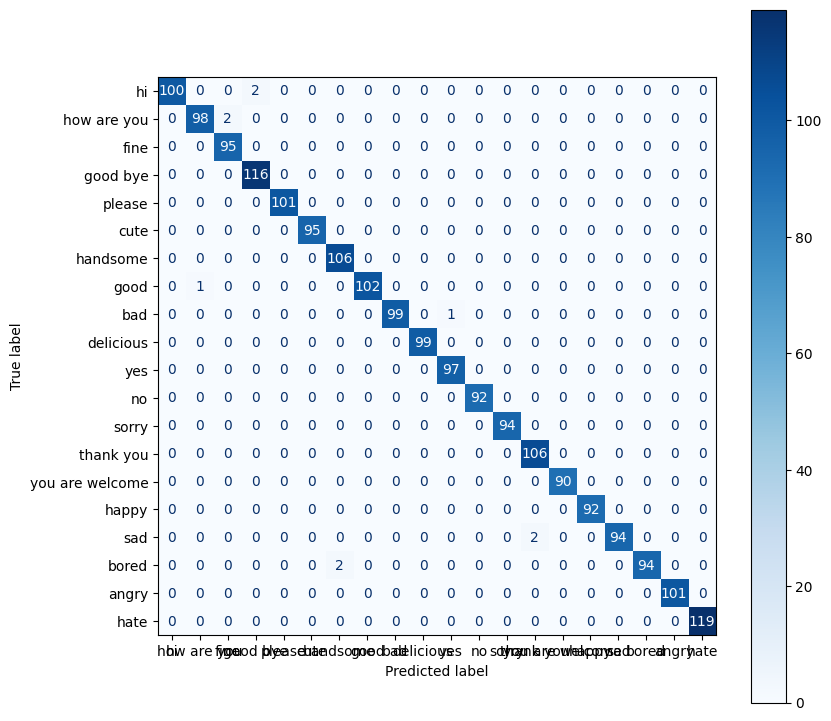

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras

model_load = keras.models.load_model(r"C:\Users\Lenovo\Desktop\AI\lstm\10000_100_batch32_b12_ES_DO0.6.keras")


labels = ["hi", "how are you", "fine", "good bye", "please", "cute", "handsome", "good", "bad", "delicious",
          'yes', 'no', "sorry", "thank you", "you are welcome", "happy", "sad", "bored", "angry", "hate" ]
y_pred = model_load.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis = 1)

print(classification_report(y_test_bool, y_pred_bool, target_names=labels, digits=4))

cm = confusion_matrix(y_test_bool, y_pred_bool )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(9,9))
disp.plot(ax=ax,cmap=plt.cm.Blues)
